1. Import and Install dependencies

In [ ]:
!pip install tensorflow numpy opencv-python mediapipe sklearn matplotlib 

In [2]:
import cv2
import numpy as np 
import os
from matplotlib import pyplot as plt 
import time
import mediapipe as mp 

2. Keypoints using MP Holistic

In [2]:
#set up webcam capturing frame

cap = cv2.VideoCapture(0)  # access webcam. 0 is primary cam
while cap.isOpened():  # loop to read the frame when cam is opened

    #read the frame 
    ret, frame = cap.read()

    #show to screen, give pop up window a name
    cv2.imshow('Opencv feed', frame)

    #end capturing
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

In [3]:
mp_holistic = mp.solutions.holistic  #holistic model
mp_drawing = mp.solutions.drawing_utils #drawing utilities

In [ ]:
help(mp_holistic.FACEMESH_CONTOURS)

In [8]:
#function to make mediapipe detection on image

def mediapipe_detection(image, model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) #converts color from bgr to rbg
    image.flags.writeable = False #image is not writable to conserve storage space
    results = model.process(image) #make predictions
    image.flags.writeable = True # image is now writable
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR) #converts color from rbg to bgr
    return image, results


In [9]:
#function to draw landmark on image

def draw_landmarks(image, results):
    mp_drawing.draw_landmarks(image, results.face_landmarks,mp_holistic.FACEMESH_CONTOURS)  # Draw face connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS) #Draw pose connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS) #Draw left hand connections
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS) #Draw right hand connections


In [10]:
def draw_styled_landmarks(image, results):
    #Draw face connections
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_CONTOURS, mp_drawing.DrawingSpec(color=(80, 110, 10), thickness=1, circle_radius=1), mp_drawing.DrawingSpec(color=(80, 256, 121), thickness=1, circle_radius=1))
    #Draw Pose connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS, mp_drawing.DrawingSpec(color=(80, 22, 10), thickness = 2, circle_radius = 4), mp_drawing.DrawingSpec(color = (80, 44, 121), thickness = 2, circle_radius = 2))
    #Draw left hand connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS, mp_drawing.DrawingSpec(color = (121, 22, 76), thickness = 2, circle_radius = 4), mp_drawing.DrawingSpec(color = (121, 44, 250), thickness = 2, circle_radius = 2))
    #Draw right hand connections
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS, mp_drawing.DrawingSpec(color = (245, 117, 66), thickness = 2, circle_radius = 4), mp_drawing.DrawingSpec(color = (245, 66, 230), thickness = 2, circle_radius = 2))


In [14]:
cap = cv2.VideoCapture(0)
#set mediapipe model
with mp_holistic.Holistic(min_detection_confidence = 0.5, min_tracking_confidence = 0.5) as holistic:
    while cap.isOpened():
        #read feed
        ret, frame = cap.read()
        #make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        #Draw landmarks
        draw_styled_landmarks(image, results)
        #show to screen
        cv2.imshow('OpenCV Feed', image)
        #Break gracefully
        if cv2.waitKey(10) & 0xFF == ord ('q'):
            break
    cap.release()
    cv2.destroyAllWindows()
    cv2.waitKey(1)


<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

In [15]:
draw_landmarks(frame, results)

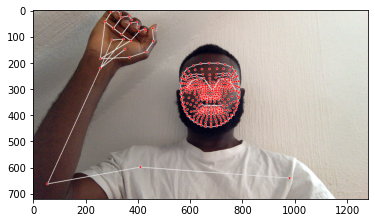

In [16]:
#plot the last action
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

3. Extract Keypoint Values

In [17]:
len(results.pose_landmarks.landmark)

33

In [18]:
#extracting keypoint landmark values for each pose
pose = []
for res in results.pose_landmarks.landmark:
    test = np.array([res.x, res.y, res.z, res.visibility])
    pose.append(test)

In [19]:
#Extracting keypoint landmark (action) for detection
pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(132)

face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(1404)

lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)

rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)

In [20]:
face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(1404)
face

array([ 0.53054142,  0.50712162, -0.02813026, ...,  0.5914396 ,
        0.38551682,  0.01676814])

In [22]:
#function to extract all key points
def extract_keypoints(results):
    pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*4)
    #face landmark
    face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468*3)
    #left hand landmark
    lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    #right landmark
    rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    #return the keypoint
    return np.concatenate([pose, face, lh, rh])


In [25]:
result_test = extract_keypoints(results)
result_test

array([ 0.53531182,  0.42527309, -0.79002249, ...,  0.26140776,
        0.01999135,  0.07597873])

In [26]:
#save the extracted keypoints
np.save('0', result_test)

In [27]:
#load points for test
np.load('0.npy')

array([ 0.53531182,  0.42527309, -0.79002249, ...,  0.26140776,
        0.01999135,  0.07597873])

4. Setup Folders for collection

In [29]:
# Path for exported data, numpy arrays
DATA_PATH = os.path.join('MP_Data') 

# Actions that we try to detect
actions = np.array(['hello', 'thanks', 'iloveyou'])

# Thirty videos worth of data
no_sequences = 30

# Videos are going to be 30 frames in length
sequence_length = 30

# Folder start
start_folder = 0

In [30]:
#create a folder for each action
for action in actions: 
    for sequence in range(no_sequences):
        try:
            os.makedirs(os.path.join(DATA_PATH, action, str(sequence)))
        except:
            pass

5. Collect keypoints values for training and testing

In [31]:
cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    
    # NEW LOOP
    # Loop through actions
    for action in actions:
        # Loop through sequences aka videos
        for sequence in range(start_folder, start_folder+no_sequences):
            # Loop through video length aka sequence length
            for frame_num in range(sequence_length):

                # Read feed
                ret, frame = cap.read()

                # Make detections
                image, results = mediapipe_detection(frame, holistic)

                # Draw landmarks
                draw_styled_landmarks(image, results)
                
                # NEW Apply wait logic
                if frame_num == 0: 
                    cv2.putText(image, 'STARTING COLLECTION', (120,200), 
                               cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255, 0), 4, cv2.LINE_AA)
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                    cv2.waitKey(500)
                else: 
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                
                # NEW Export keypoints
                keypoints = extract_keypoints(results)
                npy_path = os.path.join(DATA_PATH, action, str(sequence), str(frame_num))
                np.save(npy_path, keypoints)

                # Break gracefully
                if cv2.waitKey(10) & 0xFF == ord('q'):
                    break
                    
    cap.release()
    cv2.destroyAllWindows()
    cv2.waitKey(1)

6. Preprocess Data and Create Labels and features 

In [32]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [46]:
label_map = {label:num for num, label in enumerate(actions)}
label_map

{'hello': 0, 'thanks': 1, 'iloveyou': 2}

In [47]:
sequences, labels = [], []
for action in actions:
    for sequence in range(no_sequences):
        window = []
        for frame_num in range(sequence_length):
            res = np.load(os.path.join(DATA_PATH, action, str(sequence), "{}.npy".format(frame_num)))
            window.append(res)
        sequences.append(window)
        labels.append(label_map[action])

In [48]:
np.array(sequences).shape

(90, 30, 1662)

In [49]:
np.array(labels).shape

(90,)

In [50]:
X = np.array(sequences)
X.shape

(90, 30, 1662)

In [51]:
y = to_categorical(labels).astype(int)

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.20)

In [53]:
y_test.shape

(18, 3)

7. Build and Train LSTM Neural Networks
+ LSTM requires only less data to produce a higher accuracy model
+ LSTM is a lot simpler and faster to train
+ and faster detection time

In [54]:
#import dependecies for neural network 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import TensorBoard

In [55]:
#create log diretory and setup tensorboard call back to monitor board while its training
log_dir = os.path.join('Logs')
tb_callback = TensorBoard(log_dir=log_dir)

2021-08-31 12:54:56.160018: I tensorflow/core/profiler/lib/profiler_session.cc:131] Profiler session initializing.
2021-08-31 12:54:56.160259: I tensorflow/core/profiler/lib/profiler_session.cc:146] Profiler session started.
2021-08-31 12:54:56.175445: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session tear down.


In [56]:
#setup neural network for training
model = Sequential()
#stacking three set of lstm layers
model.add(LSTM(64, return_sequences= True, activation='relu', input_shape = (30, 1662))) 
model.add(LSTM(128, return_sequences= True, activation='relu'))
model.add(LSTM(64, return_sequences= False, activation='relu'))
#add dense layers
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
#output layer
model.add(Dense(actions.shape[0], activation='softmax'))

In [57]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])

In [60]:
model.fit(X_train, y_train, epochs=70, callbacks=[tb_callback])

Epoch 1/70
2/3 [===================>..........] - ETA: 0s - loss: 0.4227 - categorical_accuracy: 0.8125

2021-08-31 12:58:37.397515: I tensorflow/core/profiler/lib/profiler_session.cc:131] Profiler session initializing.
2021-08-31 12:58:37.397570: I tensorflow/core/profiler/lib/profiler_session.cc:146] Profiler session started.
2021-08-31 12:58:37.588292: I tensorflow/core/profiler/lib/profiler_session.cc:66] Profiler session collecting data.
2021-08-31 12:58:37.622754: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session tear down.
2021-08-31 12:58:37.657929: I tensorflow/core/profiler/rpc/client/save_profile.cc:136] Creating directory: Logs/train/plugins/profile/2021_08_31_12_58_37

2021-08-31 12:58:37.685895: I tensorflow/core/profiler/rpc/client/save_profile.cc:142] Dumped gzipped tool data for trace.json.gz to Logs/train/plugins/profile/2021_08_31_12_58_37/Olatundes-MBP.local.trace.json.gz
2021-08-31 12:58:37.717103: I tensorflow/core/profiler/rpc/client/save_profile.cc:136] Creating directory: Logs/train/plugins/profile/2021_08_31_12_58_37

2021-08-31 12:58:37.75

3/3 [==============================] - 1s 419ms/step - loss: 0.4295 - categorical_accuracy: 0.8056
Epoch 2/70
3/3 [==============================] - 1s 218ms/step - loss: 0.5530 - categorical_accuracy: 0.7361
Epoch 3/70
3/3 [==============================] - 1s 351ms/step - loss: 0.2990 - categorical_accuracy: 0.8889
Epoch 4/70
3/3 [==============================] - 1s 163ms/step - loss: 0.3496 - categorical_accuracy: 0.8611
Epoch 5/70
3/3 [==============================] - 1s 268ms/step - loss: 0.3874 - categorical_accuracy: 0.8333
Epoch 6/70
3/3 [==============================] - 1s 201ms/step - loss: 0.4847 - categorical_accuracy: 0.7639
Epoch 7/70
3/3 [==============================] - 1s 157ms/step - loss: 0.3093 - categorical_accuracy: 0.8889
Epoch 8/70
3/3 [==============================] - 1s 282ms/step - loss: 0.3890 - categorical_accuracy: 0.8611
Epoch 9/70
3/3 [==============================] - 1s 177ms/step - loss: 0.3007 - categorical_accuracy: 0.8889
Epoch 10/70
3/3 [====

KeyboardInterrupt: 

In [61]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_3 (LSTM)                (None, 30, 64)            442112    
_________________________________________________________________
lstm_4 (LSTM)                (None, 30, 128)           98816     
_________________________________________________________________
lstm_5 (LSTM)                (None, 64)                49408     
_________________________________________________________________
dense_3 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_4 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_5 (Dense)              (None, 3)                 99        
Total params: 596,675
Trainable params: 596,675
Non-trainable params: 0
________________________________________________

8. Make Prediction5

In [62]:
res = model.predict(X_test)

In [63]:
actions[np.argmax(res[2])]

'thanks'

In [64]:
actions[np.argmax(y_test[2])]

'thanks'

9. Save Weights

In [65]:
#save model
model.save('action.h5')

10. Evaluation using confusion matrix and accuracy

In [66]:
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score

In [67]:
yhat = model.predict(X_train)

In [68]:
ytrue = np.argmax(y_train, axis = 1).tolist()

In [69]:
yhat = np.argmax(yhat, axis = 1).tolist()

In [70]:
multilabel_confusion_matrix(ytrue, yhat)

array([[[50,  1],
        [ 5, 16]],

       [[48,  0],
        [ 0, 24]],

       [[40,  5],
        [ 1, 26]]])

In [71]:
accuracy_score(ytrue, yhat)

0.9166666666666666

11. Test in real time

In [72]:
from scipy import stats

In [73]:
colors = [(245,117,16), (117,245,16), (16,117,245)]
def prob_viz(res, actions, input_frame, colors):
    output_frame = input_frame.copy()
    for num, prob in enumerate(res):
        cv2.rectangle(output_frame, (0,60+num*40), (int(prob*100), 90+num*40), colors[num], -1)
        cv2.putText(output_frame, actions[num], (0, 85+num*40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2, cv2.LINE_AA)
        
    return output_frame

In [74]:
plt.figure(figsize=(18,18))
plt.imshow(prob_viz(res, actions, image, colors))

TypeError: only size-1 arrays can be converted to Python scalars

<Figure size 1296x1296 with 0 Axes>

In [75]:
# 1. New detection variables
sequence = []
sentence = []
predictions = []
threshold = 0.7

cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)
        
        # 2. Prediction logic
        keypoints = extract_keypoints(results)
        sequence.append(keypoints)
        sequence = sequence[-30:]
        
        if len(sequence) == 30:
            res = model.predict(np.expand_dims(sequence, axis=0))[0]
            print(actions[np.argmax(res)])
            predictions.append(np.argmax(res))
            
            
        #3. Viz logic
            if np.unique(predictions[-10:])[0]==np.argmax(res): 
                if res[np.argmax(res)] > threshold: 
                    
                    if len(sentence) > 0: 
                        if actions[np.argmax(res)] != sentence[-1]:
                            sentence.append(actions[np.argmax(res)])
                    else:
                        sentence.append(actions[np.argmax(res)])

            if len(sentence) > 5: 
                sentence = sentence[-5:]

            # Viz probabilities
            image = prob_viz(res, actions, image, colors)
            
        cv2.rectangle(image, (0,0), (640, 40), (245, 117, 16), -1)
        cv2.putText(image, ' '.join(sentence), (3,30), 
                       cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
        
        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()
    cv2.waitKey(1)

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti